<a href="https://colab.research.google.com/github/nellyfadil/Neuro-265/blob/main/FinalPosterPres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#import 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as pearsonr

In [83]:
from numpy.lib.index_tricks import unravel_index
#import data 
url = 'https://raw.githubusercontent.com/nellyfadil/Neuro-265/main/Coding%20Final%20Data.csv'
alz_data = pd.read_csv(url)
alz_data

,Donor ID,Sex,Atherosclerosis,total AT8 positive area_Layer1,total AT8 positive area_Layer2,total pTDP43 positive area_Layer1,total pTDP43 positive area_Layer5-6
0,H19.33.004,Female,Mild,1975.080078,847.397400,0.000000,0.000000
1,H20.33.001,Male,Mild,14229.885740,7990.394043,400.802887,954.328491
2,H20.33.002,Female,Moderate,1784.113770,1064.027222,0.000000,0.000000
3,H20.33.004,Male,Mild,218724.140600,86230.742190,0.000000,0.000000
4,H20.33.005,Female,Mild,12398.219730,11807.708010,0.000000,0.000000
...,...,...,...,...,...,...,...
79,H21.33.043,Female,Moderate,3263.033691,4088.541504,0.000000,0.000000
80,H21.33.044,Female,Mild,110072.343800,171691.578100,0.000000,0.000000
81,H21.33.045,Female,Moderate,793676.500000,860485.562500,2977.464600,5764.969238
82,H21.33.046,Male,Mild,25807.376950,35646.546880,0.000000,0.000000


In [95]:
#create variables 
sex= alz_data.iloc[:,1]
Atherosclerosis = alz_data.iloc[:,2]
total_AT8_positive_area_Layer1 = alz_data.iloc[:,3]
total_AT8_positive_area_Layer2 = alz_data.iloc[:,4]
pTDP43_layer1 = alz_data.iloc[:,-2]
pTDP43_layer5_6 = alz_data.iloc[:,-1]

Text(0.5, 1.0, 'Distribution of Monoclonal antibody in Layer 1')

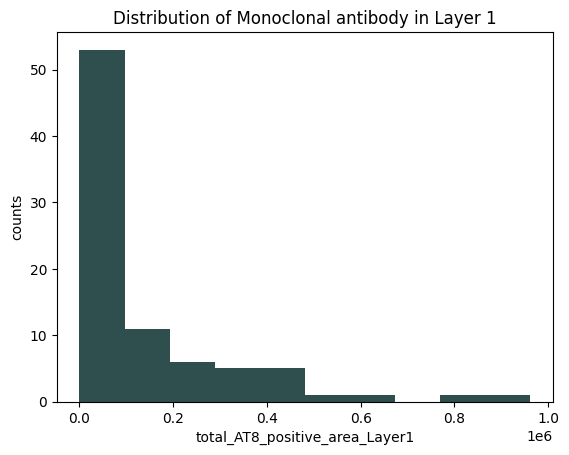

In [96]:
#create histogram of at8 layer 1 
plt.hist(total_AT8_positive_area_Layer1, color = 'darkslategrey')
plt.ylabel('counts')
plt.xlabel('total_AT8_positive_area_Layer1')
plt.title('Distribution of Monoclonal antibody in Layer 1')

     

Text(0.5, 1.0, 'Distribution of Monoclonal antibody in Layer 2')

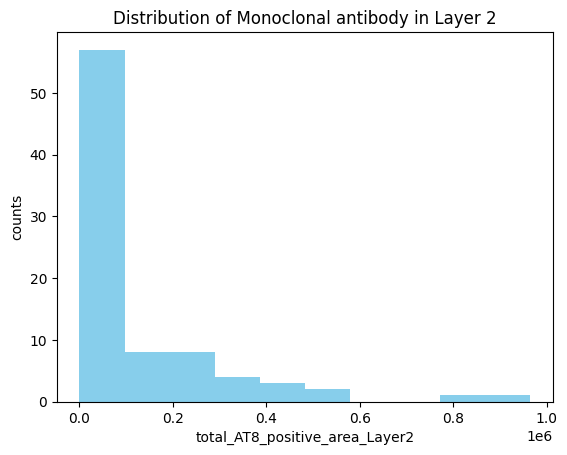

In [97]:
#create histograms of at8 layer2 
plt.hist(total_AT8_positive_area_Layer2, color = 'skyblue')
plt.ylabel('counts')
plt.xlabel('total_AT8_positive_area_Layer2')
plt.title('Distribution of Monoclonal antibody in Layer 2') 

Text(0.5, 1.0, 'Distribution of Transactive response DNA binding protein of 43 kDa ')

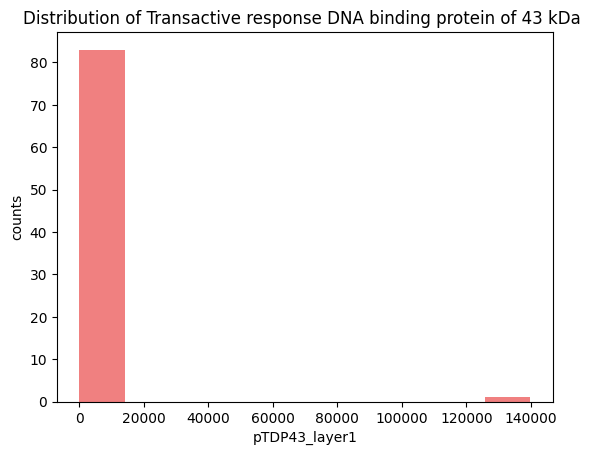

In [87]:
#create histogram of pTDP43_layer1
plt.hist(pTDP43_layer1, color = 'lightCoral')
plt.ylabel('counts')
plt.xlabel('pTDP43_layer1')
plt.title('Distribution of Transactive response DNA binding protein of 43 kDa ') 

Text(0.5, 1.0, 'Distribution of Transactive response DNA binding protein of 43 kDa')

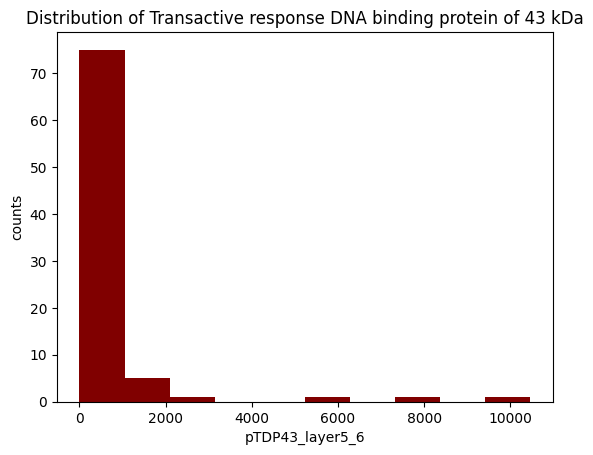

In [88]:
#create histogram of pTDP43_layer5_6
plt.hist(pTDP43_layer5_6, color = 'Maroon')
plt.ylabel('counts')
plt.xlabel('pTDP43_layer5_6')
plt.title('Distribution of Transactive response DNA binding protein of 43 kDa') 

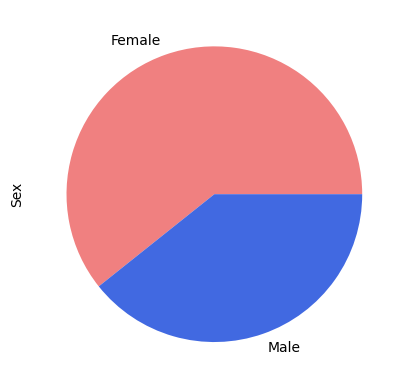

In [89]:
#make pie chart for grouping variables 
colors = ['lightcoral', 'Royalblue']
alz_data['Sex'].value_counts().plot(kind = 'pie', colors = colors)
plt.ylabel('Sex')
plt.show()

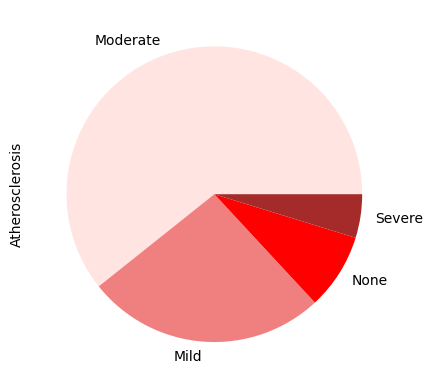

In [90]:
#make pie chart for grouping variables 
colors = ['mistyrose', 'lightcoral','red', 'brown']
alz_data['Atherosclerosis'].value_counts().plot(kind='pie', colors=colors)
plt.ylabel('Atherosclerosis')
plt.show()

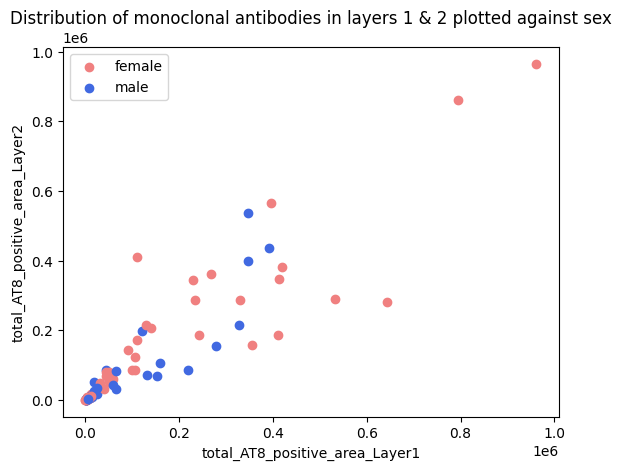

In [98]:
#make scatter plot between two dependant variables 
alz_data_length=len(alz_data)

for i in range(alz_data_length):
  if alz_data.iloc[i,1] == 'Female':
    plt.scatter(alz_data.iloc[i,3],alz_data.iloc[i,4],color = 'lightcoral')
  else:
    plt.scatter(alz_data.iloc[i,3],alz_data.iloc[i,4],color = 'royalblue')
    plt.xlabel('total_AT8_positive_area_Layer1')
    plt.ylabel('total_AT8_positive_area_Layer2')
    plt.title('Distribution of monoclonal antibodies in layers 1 & 2 plotted against sex')

plt.legend(['female','male'])

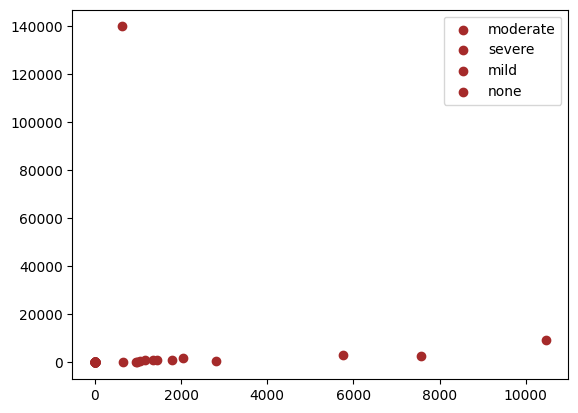

In [99]:
#make scatter plot between two dependant variables 
alz_data_length=len(alz_data)

for i in range(alz_data_length):
  if alz_data.iloc[i,2] == 'Atherosclerosis':
    plt.scatter(alz_data.iloc[i,-1],alz_data.iloc[i,-2],color = 'red')
  elif 'severe':
    plt.scatter(alz_data.iloc[i,-1],alz_data.iloc[i,-2],color = 'brown')
  elif 'mild':
    plt.scatter(alz_data.iloc[i,-1],alz_data.iloc[i,-2],color = 'lightcoral')
  else:
    plt.scatter(alz_data.iloc[i,-1],alz_data.iloc[i,-2],color = 'mistyrose')
    plt.xlabel('pTDP43_layer1')
    plt.ylabel('pTDP43_layer5_6')
    plt.title('Distribution of monoclonal antibodies in layers 1 & 2 plotted against sex')

plt.legend(['moderate','severe', 'mild','none'])

In [105]:
#Make variables into numpy arrays 
female_at8_layer1 = np.array(alz_data.loc[alz_data['Sex'] == 'Female',['total_AT8_positive_area_Layer1']])
female_at8_layer2 = np.array(alz_data.loc[alz_data['Sex'] == 'Female',['total_AT8_positive_area_Layer2']])
male_at8_layer1 = np.array(alz_data.loc[alz_data['Sex'] == 'Male',['total_AT8_positive_area_Layer1']])
male_at8_layer2 = np.array(alz_data.loc[alz_data['Sex'] == 'Male',['total_AT8_positive_area_Layer2']])
SA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'severe', ['SA_pTDP43_layer1'])
SA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'severe', ['SA_pTDP43_layer5_6'])
MA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'moderate', ['MA_pTDP43_layer1'])
MA_pTDP43_layer5_6 = np.array (alz_data.loc[alz_data['Atherosclerosis']] == 'moderate',['MA_pTDP43_layer5_6'])
MildA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'mild',['mildA_pTDP43_layer1'])
MildA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'mild',['mildA_pTDP43_layer5_6'])
NA_pTDP43_layer1 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'none',['NA_pTDP43_layer1'])
NA_pTDP43_layer5_6 = np.array(alz_data.loc[alz_data['Atherosclerosis']] == 'none',['NA_pTDP43_layer5_6'])

KeyError: ignored

NameError: ignored

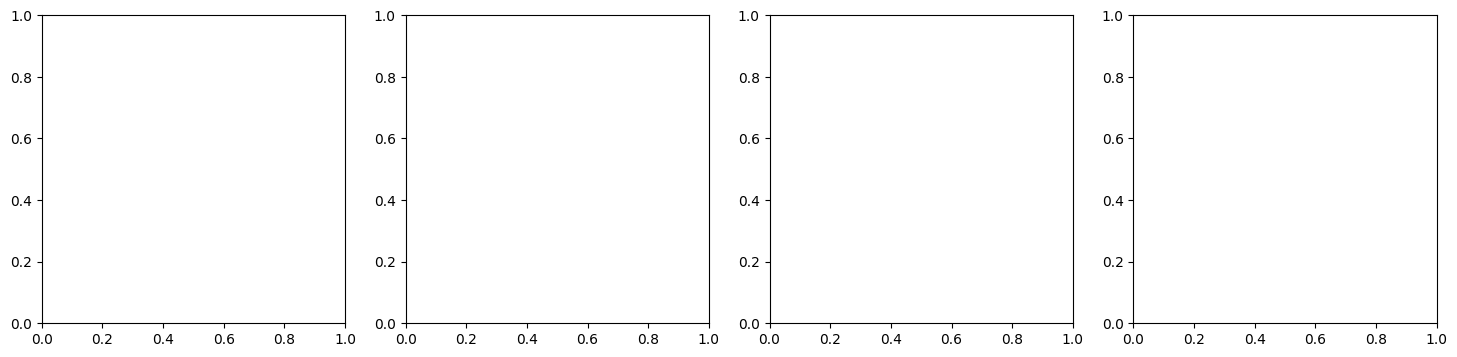

In [106]:
# make box plots
fig, ax = plt.subplots(1,4, figsize = (18,4))

total_AT8_positive_area_Layer1 = [female_at8_layer1.flatten(), male_at8_layer1.flatten()]
ax[0].boxplot(total_AT8_positive_area_Layer1)
ax[0].set_xticklabels(['females', 'males'])
ax[0].set(title = 'AT8 Layer1 distribution')

total_AT8_positive_area_Layer2 = [female_at8_layer2.flatten(), male_at8_layer2.flatten()]
ax[1].boxplot(female_at8_layer2)
ax[1].set_xticklabels(['females', 'males'])
ax[1].set(title = 'AT8 Layer2 distribution')
